In [ ]:
# =========================================
# PRÉ PROCESSAMENTO
# =========================================

# 1 - Importação do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2 - Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import re


In [ ]:
# 3 - Carregamento e junção dos datasets

# mostrar todas as colunas
pd.set_option('display.max_columns', None)

# importando o arquivo
apps = pd.read_csv("/content/drive/MyDrive/FACULDADE/google play store/googleplaystore.csv")
reviews = pd.read_csv("/content/drive/MyDrive/FACULDADE/google play store/googleplaystore_user_reviews.csv")

# limpeza inicial
apps.dropna(subset=["App"], inplace=True)
reviews.dropna(subset=["App"], inplace=True)

# juntar: cada review vai herdar as colunas do app
df = reviews.merge(apps, on="App", how="inner")



In [ ]:
# 4.1 - Inspeção inicial do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Translated_Review       72605 non-null   object 
 2   Sentiment               72615 non-null   object 
 3   Sentiment_Polarity      72615 non-null   float64
 4   Sentiment_Subjectivity  72615 non-null   float64
 5   Category                122662 non-null  object 
 6   Rating                  122622 non-null  float64
 7   Reviews                 122662 non-null  object 
 8   Size                    122662 non-null  object 
 9   Installs                122662 non-null  object 
 10  Type                    122662 non-null  object 
 11  Price                   122662 non-null  object 
 12  Content Rating          122662 non-null  object 
 13  Genres                  122662 non-null  object 
 14  Last Updated        

In [ ]:
# 4.2 - Inspeção inicial do DataFrame
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [ ]:
#5 - COLUNAS DO DATASET

#googleplaystore_user_reviews.csv (Reviews dos usuários)

# App → Nome do aplicativo
# Translated_Review → Avaliação traduzida (texto do usuário) (EXCLUÍDA)
# Sentiment → Sentimento (positivo, negativo ou neutro)
# Sentiment_Polarity → Polaridade do sentimento (varia de -1 a 1)
# Sentiment_Subjectivity → Subjetividade do sentimento (0 = objetivo, 1 = subjetivo) (EXCLUÍDA)

#googleplaystore.csv (Dados dos aplicativos)

# App → Nome do aplicativo
# Category → Categoria do app (ex.: Jogos, Produtividade)
# Rating → Nota média do app (0 a 5)
# Reviews → Número de avaliações recebidas (contagem)
# Size → Tamanho do app (em MB, KB ou “Varies with device”)
# Installs → Número de instalações (ex.: 1,000+, 10,000,000+)
# Type → Tipo do app (Free = grátis, Paid = pago)
# Price → Preço do app (0 se grátis, valor em $ se pago)
# Content Rating → Classificação etária (ex.: Everyone, Teen, Mature 17+)
# Genres → Gênero/subcategoria (pode ter mais de um, ex.: Action;Adventure)
# Last Updated → Data da última atualização
# Current Ver → Versão atual do aplicativo
# Android Ver → Versão mínima do Android necessária

In [ ]:
# 6.1 - Verificação da dimensão do DataFrame
df.shape

(122662, 17)

In [ ]:
# 6.2 - Verificação da dimensão do DataFrame
quantidade_app = df['App'].nunique()
categoria = df['Category'].unique()
print("Número de apps na base:", quantidade_app)
print("--------------------------------------------")
print("As categorias são: ", categoria)


Número de apps na base: 1020
--------------------------------------------
As categorias são:  ['HEALTH_AND_FITNESS' 'SHOPPING' 'MEDICAL' 'GAME' 'PERSONALIZATION'
 'DATING' 'TRAVEL_AND_LOCAL' 'COMMUNICATION' 'SPORTS' 'ART_AND_DESIGN'
 'LIFESTYLE' 'PRODUCTIVITY' 'FAMILY' 'ENTERTAINMENT' 'PHOTOGRAPHY'
 'FINANCE' 'NEWS_AND_MAGAZINES' 'EDUCATION' 'BUSINESS' 'WEATHER' 'TOOLS'
 'MAPS_AND_NAVIGATION' 'BOOKS_AND_REFERENCE' 'HOUSE_AND_HOME' 'EVENTS'
 'SOCIAL' 'VIDEO_PLAYERS' 'FOOD_AND_DRINK' 'PARENTING' 'AUTO_AND_VEHICLES'
 'LIBRARIES_AND_DEMO' 'BEAUTY' 'COMICS']


In [ ]:
 # 7.1 - Trabalhando a coluna Size
 df['Size'].unique()

array(['3.8M', '20M', '26M', '10M', 'Varies with device', '15M', '8.1M',
       '32M', '25M', '7.4M', '37M', '21M', '14M', '4.3M', '52M', '67M',
       '11M', '68M', '2.9M', '19M', '6.3M', '35M', '91M', '45M', '29M',
       '72M', '4.6M', '9.1M', '9.8M', '9.7M', '22M', '1.6M', '6.1M',
       '24M', '6.9M', '8.5M', '23M', '39M', '1.5M', '3.3M', '6.8M', '86M',
       '55M', '5.9M', '7.3M', '9.5M', '17M', '2.1M', '5.6M', '63M',
       '4.1M', '42M', '62M', '28M', '16M', '57M', '97M', '46M', '58M',
       '9.6M', '36M', '5.7M', '7.5M', '13M', '292k', '3.5M', '2.3M',
       '7.6M', '92M', '12M', '6.4M', '232k', '624k', '50M', '27M', '2.8M',
       '38M', '53M', '5.2M', '49M', '3.4M', '3.0M', '66M', '9.3M', '65M',
       '85M', '9.4M', '78M', '5.3M', '61M', '8.0M', '34M', '7.8M', '5.1M',
       '76M', '44M', '95M', '5.0M', '80M', '33M', '18M', '4.9M', '2.7M',
       '2.4M', '2.6M', '8.4M', '40M', '4.5M', '51M', '6.6M', '41M', '74M',
       '1.8M', '1.9M', '59M', '6.2M', '3.6M', '5.8M', '3.2M

In [ ]:
 # 7.2 - Trabalhando a coluna Size

 def convert_size_to_mb(size):
    """
    Converte o tamanho do app de formato string para MB (float).
    Suporta valores com 'M', 'k' ou 'Varies with device'.
    Retorna NaN se o valor não for reconhecido.
    """
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1])  # remove o 'M'
        elif size.endswith('k'):
            return float(size[:-1]) / 1024  # KB → MB
        elif size.lower() == 'varies with device':
            return np.nan
    return np.nan

def size_to_category_num(mb):
    """
    Converte tamanho em MB para uma categoria numérica:
    1 = Small (≤10MB)
    2 = Medium (10–50MB)
    3 = Large (>50MB)
    Retorna NaN se o valor de MB for ausente.
    """
    if pd.isna(mb):
        return np.nan
    elif mb <= 10:
        return 1
    elif mb <= 50:
        return 2
    else:
        return 3

# Aplicar as funções ao DataFrame
df['Size_MB'] = df['Size'].apply(convert_size_to_mb)
df['Size_Category_Num'] = df['Size_MB'].apply(size_to_category_num)

# Arredondar e garantir valores entre 1 e 3, mantendo NaN
df['Size_Category_Num'] = df['Size_Category_Num'].round().clip(1,3).astype('Int64')

# Verificar resultados
print(df[['Size', 'Size_MB', 'Size_Category_Num']].head())
print("\nValores únicos finais:")
print(df['Size_Category_Num'].unique())


   Size  Size_MB  Size_Category_Num
0  3.8M      3.8                  1
1  3.8M      3.8                  1
2  3.8M      3.8                  1
3  3.8M      3.8                  1
4  3.8M      3.8                  1

Valores únicos finais:
<IntegerArray>
[1, 2, <NA>, 3]
Length: 4, dtype: Int64


In [ ]:
# 8.1 - trabalhando a coluna Installs

df['Installs'].unique()

array(['500,000+', '10,000,000+', '1,000,000+', '100,000+', '50,000,000+',
       '10,000+', '100,000,000+', '1,000+', '5,000,000+', '50,000+',
       '5,000+', '500,000,000+', '1,000,000,000+'], dtype=object)

In [ ]:
# 8.2 - trabalhando a coluna Installs

def convert_installs(installs):
    """
    Converte o número de instalações de string para inteiro.
    Remove vírgulas e sinais de '+'.
    Retorna None se o valor não for uma string reconhecível.
    """
    if isinstance(installs, str):
        return int(installs.replace(',', '').replace('+', ''))
    return None

# Aplicar a conversão de instalações ao DataFrame
df['Installs_Num'] = df['Installs'].apply(convert_installs)

def installs_category(num):
    """
    Classifica o número de instalações em categorias numéricas:
    1 = 0 – 9,999
    2 = 10,000 – 99,999
    3 = 100,000 – 999,999
    4 = 1,000,000 – 9,999,999
    5 = ≥ 10,000,000
    """
    if num < 10_000:
        return 1
    elif num < 100_000:
        return 2
    elif num < 1_000_000:
        return 3
    elif num < 10_000_000:
        return 4
    else:
        return 5

# Aplicar a categorização de instalações ao DataFrame
df['Installs_Category_Num'] = df['Installs_Num'].apply(installs_category)

# Verificar resultados
print(df[['Installs', 'Installs_Num', 'Installs_Category_Num']])


           Installs  Installs_Num  Installs_Category_Num
0          500,000+        500000                      3
1          500,000+        500000                      3
2          500,000+        500000                      3
3          500,000+        500000                      3
4          500,000+        500000                      3
...             ...           ...                    ...
122657  10,000,000+      10000000                      5
122658  10,000,000+      10000000                      5
122659  10,000,000+      10000000                      5
122660  10,000,000+      10000000                      5
122661  10,000,000+      10000000                      5

[122662 rows x 3 columns]


In [ ]:
# 9.1 - trabalhando coluna Content Rating

df['Content Rating'].unique()

array(['Everyone 10+', 'Everyone', 'Mature 17+', 'Teen',
       'Adults only 18+'], dtype=object)

In [ ]:
# 9.2 - trabalhando coluna Content Rating

# Convertendo Content Rating para valores numéricos
content_mapping = {
    'Everyone': 1,
    'Everyone 10+': 2,
    'Teen': 3,
    'Mature 17+': 4,
    'Adults only 18+': 5
}

"""
Mapeia a coluna 'Content Rating' para valores numéricos:
1 = Everyone
2 = Everyone 10+
3 = Teen
4 = Mature 17+
5 = Adults only 18+
"""
df['Content_Rating_Num'] = df['Content Rating'].map(content_mapping)

# Verificar resultados
print(df[['Content Rating', 'Content_Rating_Num']])


       Content Rating  Content_Rating_Num
0        Everyone 10+                   2
1        Everyone 10+                   2
2        Everyone 10+                   2
3        Everyone 10+                   2
4        Everyone 10+                   2
...               ...                 ...
122657       Everyone                   1
122658       Everyone                   1
122659       Everyone                   1
122660       Everyone                   1
122661       Everyone                   1

[122662 rows x 2 columns]


In [ ]:
# 10.1 - trabalhando coluna Android Ver
df['Android Ver'].unique()

array(['2.3.3 and up', '4.0 and up', '5.0 and up', '4.1 and up',
       '4.0.3 and up', 'Varies with device', '4.3 and up', '2.3 and up',
       '4.2 and up', '4.4 and up', '5.0 - 8.0', '3.0 and up',
       '1.6 and up', '2.2 and up', '2.1 and up', '3.2 and up',
       '4.0.3 - 7.1.1', '6.0 and up', '5.1 and up', '1.5 and up',
       '4.4W and up', '7.1 and up', '7.0 and up', '2.0 and up',
       '8.0 and up'], dtype=object)

In [ ]:
# 10.2 - trabalhando coluna Android Ver

def extract_android_version(ver):
    if isinstance(ver, str):
        match = re.search(r'(\d+(\.\d+)?)', ver)
        if match:
            return float(match.group(1))
    return np.nan

df['Android_Version_Num'] = df['Android Ver'].apply(extract_android_version)

# Arredondando para inteiro
df['Android_Version_Num'] = df['Android_Version_Num'].round(0).astype('Int64')

print(df[['Android Ver', 'Android_Version_Num']].head())
print(df['Android_Version_Num'].unique())

    Android Ver  Android_Version_Num
0  2.3.3 and up                    2
1  2.3.3 and up                    2
2  2.3.3 and up                    2
3  2.3.3 and up                    2
4  2.3.3 and up                    2
<IntegerArray>
[2, 4, 5, <NA>, 3, 6, 7, 8]
Length: 8, dtype: Int64


In [ ]:
# 10.3 - trabalhando coluna Rating

"""
Arredonda os valores de 'Rating' para o inteiro mais próximo e garante que fiquem no intervalo 1–5.
Mantém NaN caso o valor original seja ausente.
"""
# Arredonda para o inteiro mais próximo, mantendo NaN
df['Rating'] = df['Rating'].apply(lambda x: round(x) if not np.isnan(x) else np.nan)

# Garante que todos os valores fiquem entre 1 e 5
df['Rating'] = df['Rating'].clip(1, 5)

# Verificar resultados
print(df['Rating'].unique())


[ 4.  5.  3. nan  2.]


In [ ]:
# 11 - Exclusão de colunas irrelevante

"""
Remove colunas consideradas irrelevantes ou substituídas por versões numéricas/categóricas.
Colunas removidas:
- Textos de review e análises de sentimento
- Dados de tamanho e instalações originais (substituídos por categorias)
- Content Rating original (substituído por Content_Rating_Num)
- Informações que podem gerar confusão ou já representadas de outra forma:
  Genres, Last Updated, Current Ver, Android Ver, Price
"""
# Lista de colunas a serem excluídas
colunas_para_excluir = [
    'Translated_Review',
    'Sentiment_Subjectivity',
    'Sentiment_Polarity',
    'Last Updated',
    'Size', 'Size_MB',
    'Installs_Num', 'Installs',
    'Content Rating',
    'Genres',
    'Current Ver',
    'Android Ver',
    'Price'
]

# Remover as colunas do DataFrame
df = df.drop(columns=colunas_para_excluir)

# Exibe as 10 primeiras linhas para verificação
df.head(10)


,App,Sentiment,Category,Rating,Reviews,Type,Size_Category_Num,Installs_Category_Num,Content_Rating_Num,Android_Version_Num
0,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
1,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
2,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
3,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
4,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
5,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
6,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
7,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
8,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2
9,10 Best Foods for You,Positive,HEALTH_AND_FITNESS,4.0,2490,Free,1,3,2,2


In [ ]:
# 12.1 - Trabalhando coluna Reviews

df['Reviews'].unique()

array(['2490', '48732', '23160', ..., '353799', '353800', '353813'],
      dtype=object)

In [ ]:
# 12.2 - Correção e padronização da coluna 'Reviews'

"""
Padroniza a coluna 'Reviews' convertendo valores especiais de string para numérico.
- Substitui "0.0" por 0
- Substitui "3.0M" por 3.000.000
- Converte toda a coluna para float
"""
# Substituições de strings específicas
df['Reviews'] = df['Reviews'].replace("0.0", 0)
df['Reviews'] = df['Reviews'].replace("3.0M", 3000000.0)

# Converte toda a coluna para tipo float
df['Reviews'] = df['Reviews'].astype(float)

# Verifica o tipo final
df['Reviews'].dtype



dtype('float64')

In [ ]:
# 13 - Identificação de linhas com valores ausentes (NaN)
"""
Identifica e exibe todas as linhas do DataFrame que possuem valores ausentes (NaN).
- idxRowNan: índices das linhas com pelo menos um valor NaN
- df_com_nulos: DataFrame filtrado apenas com essas linhas
"""
# Localiza índices das linhas que possuem algum valor NaN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()[0]

# Cria um DataFrame apenas com as linhas que possuem NaN
df_com_nulos = df.iloc[idxRowNan]

# Exibe o DataFrame filtrado
display(df_com_nulos)


,App,Sentiment,Category,Rating,Reviews,Type,Size_Category_Num,Installs_Category_Num,Content_Rating_Num,Android_Version_Num
4,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
5,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
14,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
15,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
30,10 Best Foods for You,NaN,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...
122657,Houzz Interior Design Ideas,NaN,HOUSE_AND_HOME,5.0,353813.0,Free,<NA>,5,1,<NA>
122658,Houzz Interior Design Ideas,NaN,HOUSE_AND_HOME,5.0,353799.0,Free,<NA>,5,1,<NA>
122659,Houzz Interior Design Ideas,NaN,HOUSE_AND_HOME,5.0,353800.0,Free,<NA>,5,1,<NA>
122660,Houzz Interior Design Ideas,NaN,HOUSE_AND_HOME,5.0,353813.0,Free,<NA>,5,1,<NA>


In [ ]:
# 14 - Tratamendo de valores ausentes

def trata_faltantes(df):
    """
    Trata valores ausentes no DataFrame.

    Regras:
    - Colunas numéricas:
        • Inteiro (Int64): preenche com a média arredondada para inteiro
        • Float: preenche com a média
    - Colunas categóricas (object): preenche com a moda da coluna

    Retorna uma cópia do DataFrame com valores ausentes preenchidos.
    """
    df = df.copy()  # Evita alterar o DataFrame original

    # Seleciona colunas numéricas e categóricas
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_categoricas = df.select_dtypes(include='object').columns

    # Preenche valores ausentes nas colunas numéricas
    for col in colunas_numericas:
        media = df[col].mean()
        if pd.api.types.is_integer_dtype(df[col]):  # Coluna inteira
            media = int(round(media))  # Arredonda para inteiro
        df[col] = df[col].fillna(media)

    # Preenche valores ausentes nas colunas categóricas
    for col in colunas_categoricas:
        moda_serie = df[col].mode()
        if not moda_serie.empty:
            moda = moda_serie.iloc[0]
            df[col] = df[col].fillna(moda)

    return df

# Aplicar a função ao dataset
df = trata_faltantes(df)

# Verificação final de valores ausentes
faltantes_restantes = df.isnull().sum()
faltantes_restantes = faltantes_restantes[faltantes_restantes > 0]

if len(faltantes_restantes) == 0:
    print("✅ Todos os valores ausentes foram tratados com sucesso.")
else:
    print("⚠️ Ainda existem valores ausentes nas seguintes colunas:")
    print(faltantes_restantes)


✅ Todos os valores ausentes foram tratados com sucesso.


In [ ]:
# 15.1 - tratamento da coluna Sentiment

df['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
# 15.2 - tratamento da coluna Sentiment

"""
Converte a coluna 'Sentiment' em valores numéricos para facilitar análises:
- Positive → 1
- Neutral  → 0
- Negative → -1
"""
# Mapeamento de sentimentos para valores numéricos
mapeamento_sentimento = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Aplicar o mapeamento ao DataFrame
df['Sentiment'] = df['Sentiment'].map(mapeamento_sentimento)


In [ ]:
# 16 - Remoção de valores inválidos ou fora do intervalo esperado

# - Define a função limpar_valores_invalidos_playstore_v2(df)
#   que aplica filtros de consistência nas novas colunas:
#     • Rating: deve estar entre 0 e 5
#     • Sentiment: deve ser -1, 0 ou 1 (negativo, neutro, positivo)
#     • Reviews: não pode ser negativo
#     • Size_Category_Num: deve estar entre 1 e 5
#     • Installs_Category_Num: deve estar entre 1 e 5
#     • Price_Category_Num: deve estar entre 1 e 3
#     • Content_Rating_Num: deve estar entre 1 e 4
#     • Android_Version_Num: deve estar entre 1 e 5
# - Cada filtro exibe quantos registros foram removidos
# - Ao final, mostra o total de registros removidos e o total final
# - Retorna o DataFrame limpo
# ================================================================

def limpar_valores_invalidos_playstore_v2(df):
    """
    Remove registros com valores ilógicos, extremos ou fora do intervalo esperado
    no dataset da Google Play Store (versão com colunas categorizadas).
    """

    df_original = df.copy()
    total_inicial = len(df)

    def filtrar(df, condicao, nome):
        antes = len(df)
        df_filtrado = df[condicao]
        removidos = antes - len(df_filtrado)
        print(f"{nome}: {removidos} registros removidos")
        return df_filtrado

    # Rating: 0 a 5
    df = filtrar(df, (df['Rating'] >= 0) & (df['Rating'] <= 5), "Rating inválido")

    # Sentiment: -1, 0 ou 1
    df = filtrar(df, df['Sentiment'].isin([-1, 0, 1]), "Sentiment inválido")

    # Reviews: não negativo
    df = filtrar(df, df['Reviews'] >= 0, "Reviews inválido")

    # Size_Category_Num: 1 a 5
    df = filtrar(df, (df['Size_Category_Num'] >= 1) & (df['Size_Category_Num'] <= 5), "Size_Category_Num inválido")

    # Installs_Category_Num: 1 a 5
    df = filtrar(df, (df['Installs_Category_Num'] >= 1) & (df['Installs_Category_Num'] <= 5), "Installs_Category_Num inválido")


    # Content_Rating_Num: 1 a 4
    df = filtrar(df, (df['Content_Rating_Num'] >= 1) & (df['Content_Rating_Num'] <= 4), "Content_Rating_Num inválido")

    # Android_Version_Num: 1 a 5
    df = filtrar(df, (df['Android_Version_Num'] >= 1) & (df['Android_Version_Num'] <= 5), "Android_Version_Num inválido")

    total_final = len(df)
    print(f"\nTotal de registros removidos: {total_inicial - total_final}")
    print(f"Total final de registros válidos: {total_final}")

    return df


df_limpo = limpar_valores_invalidos_playstore_v2(df)



Rating inválido: 0 registros removidos
Sentiment inválido: 0 registros removidos
Reviews inválido: 0 registros removidos
Size_Category_Num inválido: 0 registros removidos
Installs_Category_Num inválido: 0 registros removidos
Content_Rating_Num inválido: 40 registros removidos
Android_Version_Num inválido: 1020 registros removidos

Total de registros removidos: 1060
Total final de registros válidos: 121602


In [ ]:
# 17 - Estatísticas descritivas do dataset limpo

df.describe()


,Sentiment,Rating,Reviews,Size_Category_Num,Installs_Category_Num,Content_Rating_Num,Android_Version_Num
count,122662.000000,122662.000000,1.226620e+05,122662.0,122662.000000,122662.000000,122662.0
mean,0.636774,4.190439,2.243249e+06,2.044317,4.384618,1.534485,3.984796
std,0.725928,0.432126,6.324819e+06,0.568787,0.822478,0.950429,0.616795
min,-1.000000,2.000000,1.000000e+01,1.0,1.000000,1.000000,2.0
25%,1.000000,4.000000,2.752400e+04,2.0,4.000000,1.000000,4.0
50%,1.000000,4.000000,1.598720e+05,2.0,5.000000,1.000000,4.0
75%,1.000000,4.000000,1.500999e+06,2.0,5.000000,2.000000,4.0
max,1.000000,5.000000,7.815831e+07,3.0,5.000000,5.000000,8.0


In [ ]:
# 18 - Inspeção final do DataFrame após pré-processamento
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App                    122662 non-null  object 
 1   Sentiment              122662 non-null  int64  
 2   Category               122662 non-null  object 
 3   Rating                 122662 non-null  float64
 4   Reviews                122662 non-null  float64
 5   Type                   122662 non-null  object 
 6   Size_Category_Num      122662 non-null  Int64  
 7   Installs_Category_Num  122662 non-null  int64  
 8   Content_Rating_Num     122662 non-null  int64  
 9   Android_Version_Num    122662 non-null  Int64  
dtypes: Int64(2), float64(2), int64(3), object(3)
memory usage: 9.6+ MB


In [ ]:
# 19 - Renomear colunas
df = df.rename(columns={
    'Size_Category_Num': 'Size',
    'Installs_Category_Num': 'Installs',
    'Content_Rating_Num': 'Content_Rating',
    'Android_Version_Num': 'Android_Version',

})

print("Colunas renomeadas com sucesso.")
print(df.columns)

df.head(10)

Colunas renomeadas com sucesso.
Index(['App', 'Sentiment', 'Category', 'Rating', 'Reviews', 'Type', 'Size',
       'Installs', 'Content_Rating', 'Android_Version'],
      dtype='object')


,App,Sentiment,Category,Rating,Reviews,Type,Size,Installs,Content_Rating,Android_Version
0,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
1,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
2,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
3,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
4,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
5,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
6,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
7,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
8,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2
9,10 Best Foods for You,1,HEALTH_AND_FITNESS,4.0,2490.0,Free,1,3,2,2


In [ ]:
# 20 - verificação final das colunas e seus valores únicos
cols = [
    'App',
    'Sentiment',
    'Category',
    'Rating',
    'Reviews',
    'Size',
    'Installs',
    'Type',
    'Content_Rating',
    'Android_Version'
]


for col in cols:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-"*50)


App unique values:
['10 Best Foods for You' '11st' '1800 Contacts - Lens Store' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']
--------------------------------------------------
Sentiment unique values:
[ 1  0 -1]
--------------------------------------------------
Category unique values:
['HEALTH_AND_FITNESS' 'SHOPPING' 'MEDICAL' 'GAME' 'PERSONALIZATION'
 'DATING' 'TRAVEL_AND_LOCAL' 'COMMUNICATION' 'SPORTS' 'ART_AND_DESIGN'
 'LIFESTYLE' 'PRODUCTIVITY' 'FAMILY' 'ENTERTAINMENT' 'PHOTOGRAPHY'
 'FINANCE' 'NEWS_AND_MAGAZINES' 'EDUCATION' 'BUSINESS' 'WEATHER' 'TOOLS'
 'MAPS_AND_NAVIGATION' 'BOOKS_AND_REFERENCE' 'HOUSE_AND_HOME' 'EVENTS'
 'SOCIAL' 'VIDEO_PLAYERS' 'FOOD_AND_DRINK' 'PARENTING' 'AUTO_AND_VEHICLES'
 'LIBRARIES_AND_DEMO' 'BEAUTY' 'COMICS']
--------------------------------------------------
Rating unique values:
[4.         5.         3.         4.19043891 2.        ]
--------------------------------------------------
Reviews 

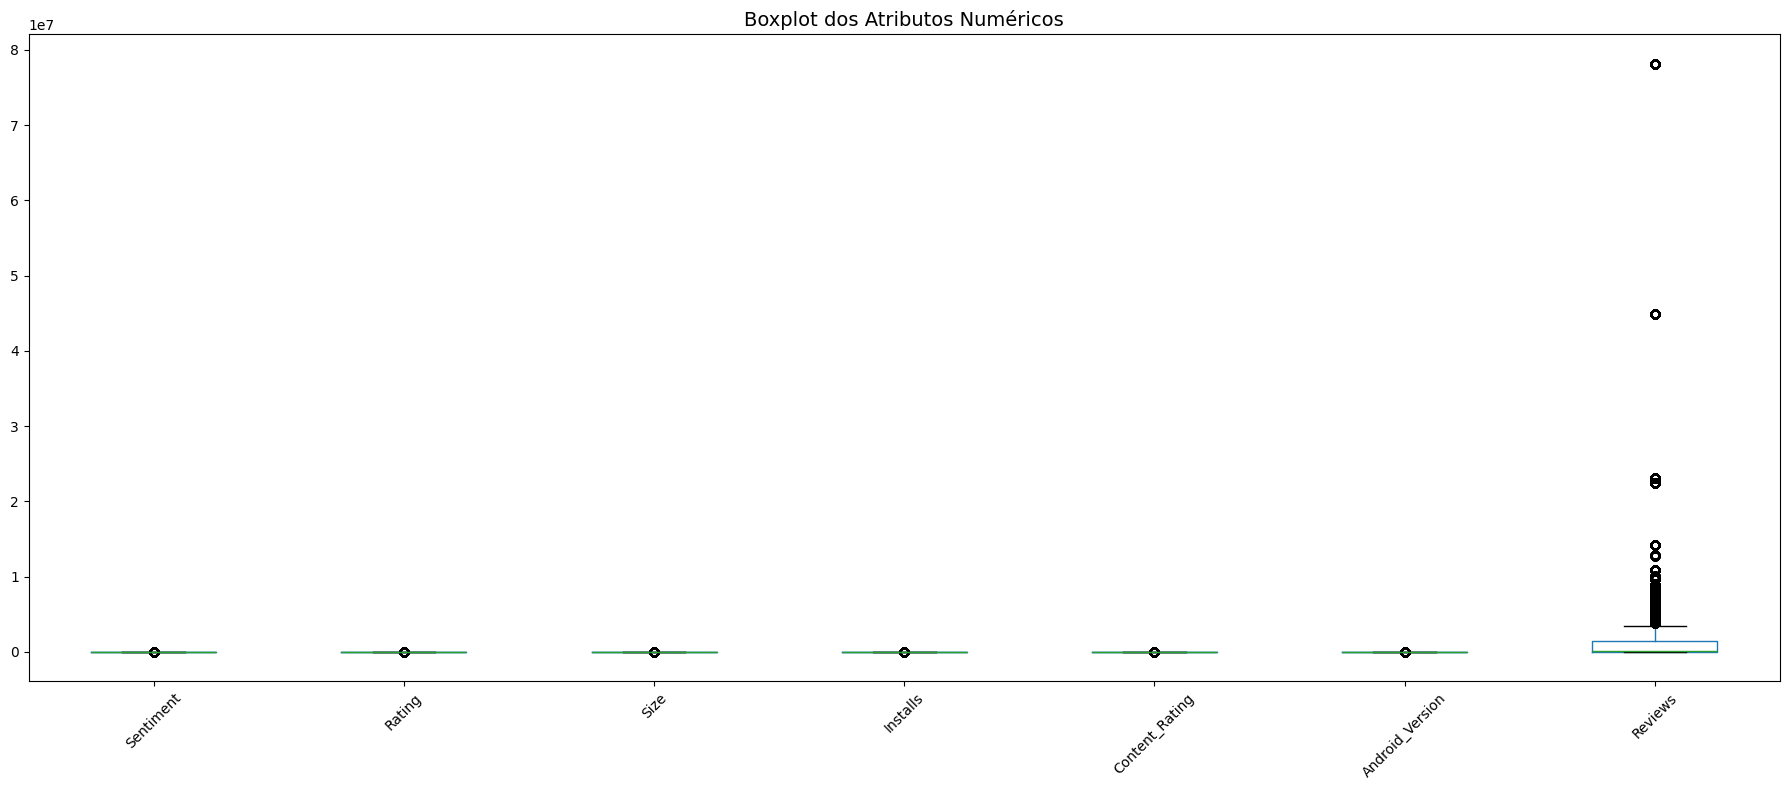

In [ ]:
# =========================================
# VISUALIZAÇÃO EM GRÁFICOS
# =========================================

# 1.1 - Atributos númericos
"""
Gera um boxplot para todas as colunas numéricas selecionadas, permitindo visualizar:
- Distribuição dos valores
- Outliers
- Diferenças de escala entre atributos

Colunas analisadas: Sentiment, Rating, Size, Installs, Content_Rating, Android_Version, Reviews
"""
colunas_numericas = ['Sentiment', 'Rating', 'Size', 'Installs',
                     'Content_Rating', 'Android_Version', 'Reviews']

plt.figure(figsize=(18,8))
df.boxplot(column=colunas_numericas, rot=45, grid=False)
plt.title("Boxplot dos Atributos Numéricos", fontsize=14)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()



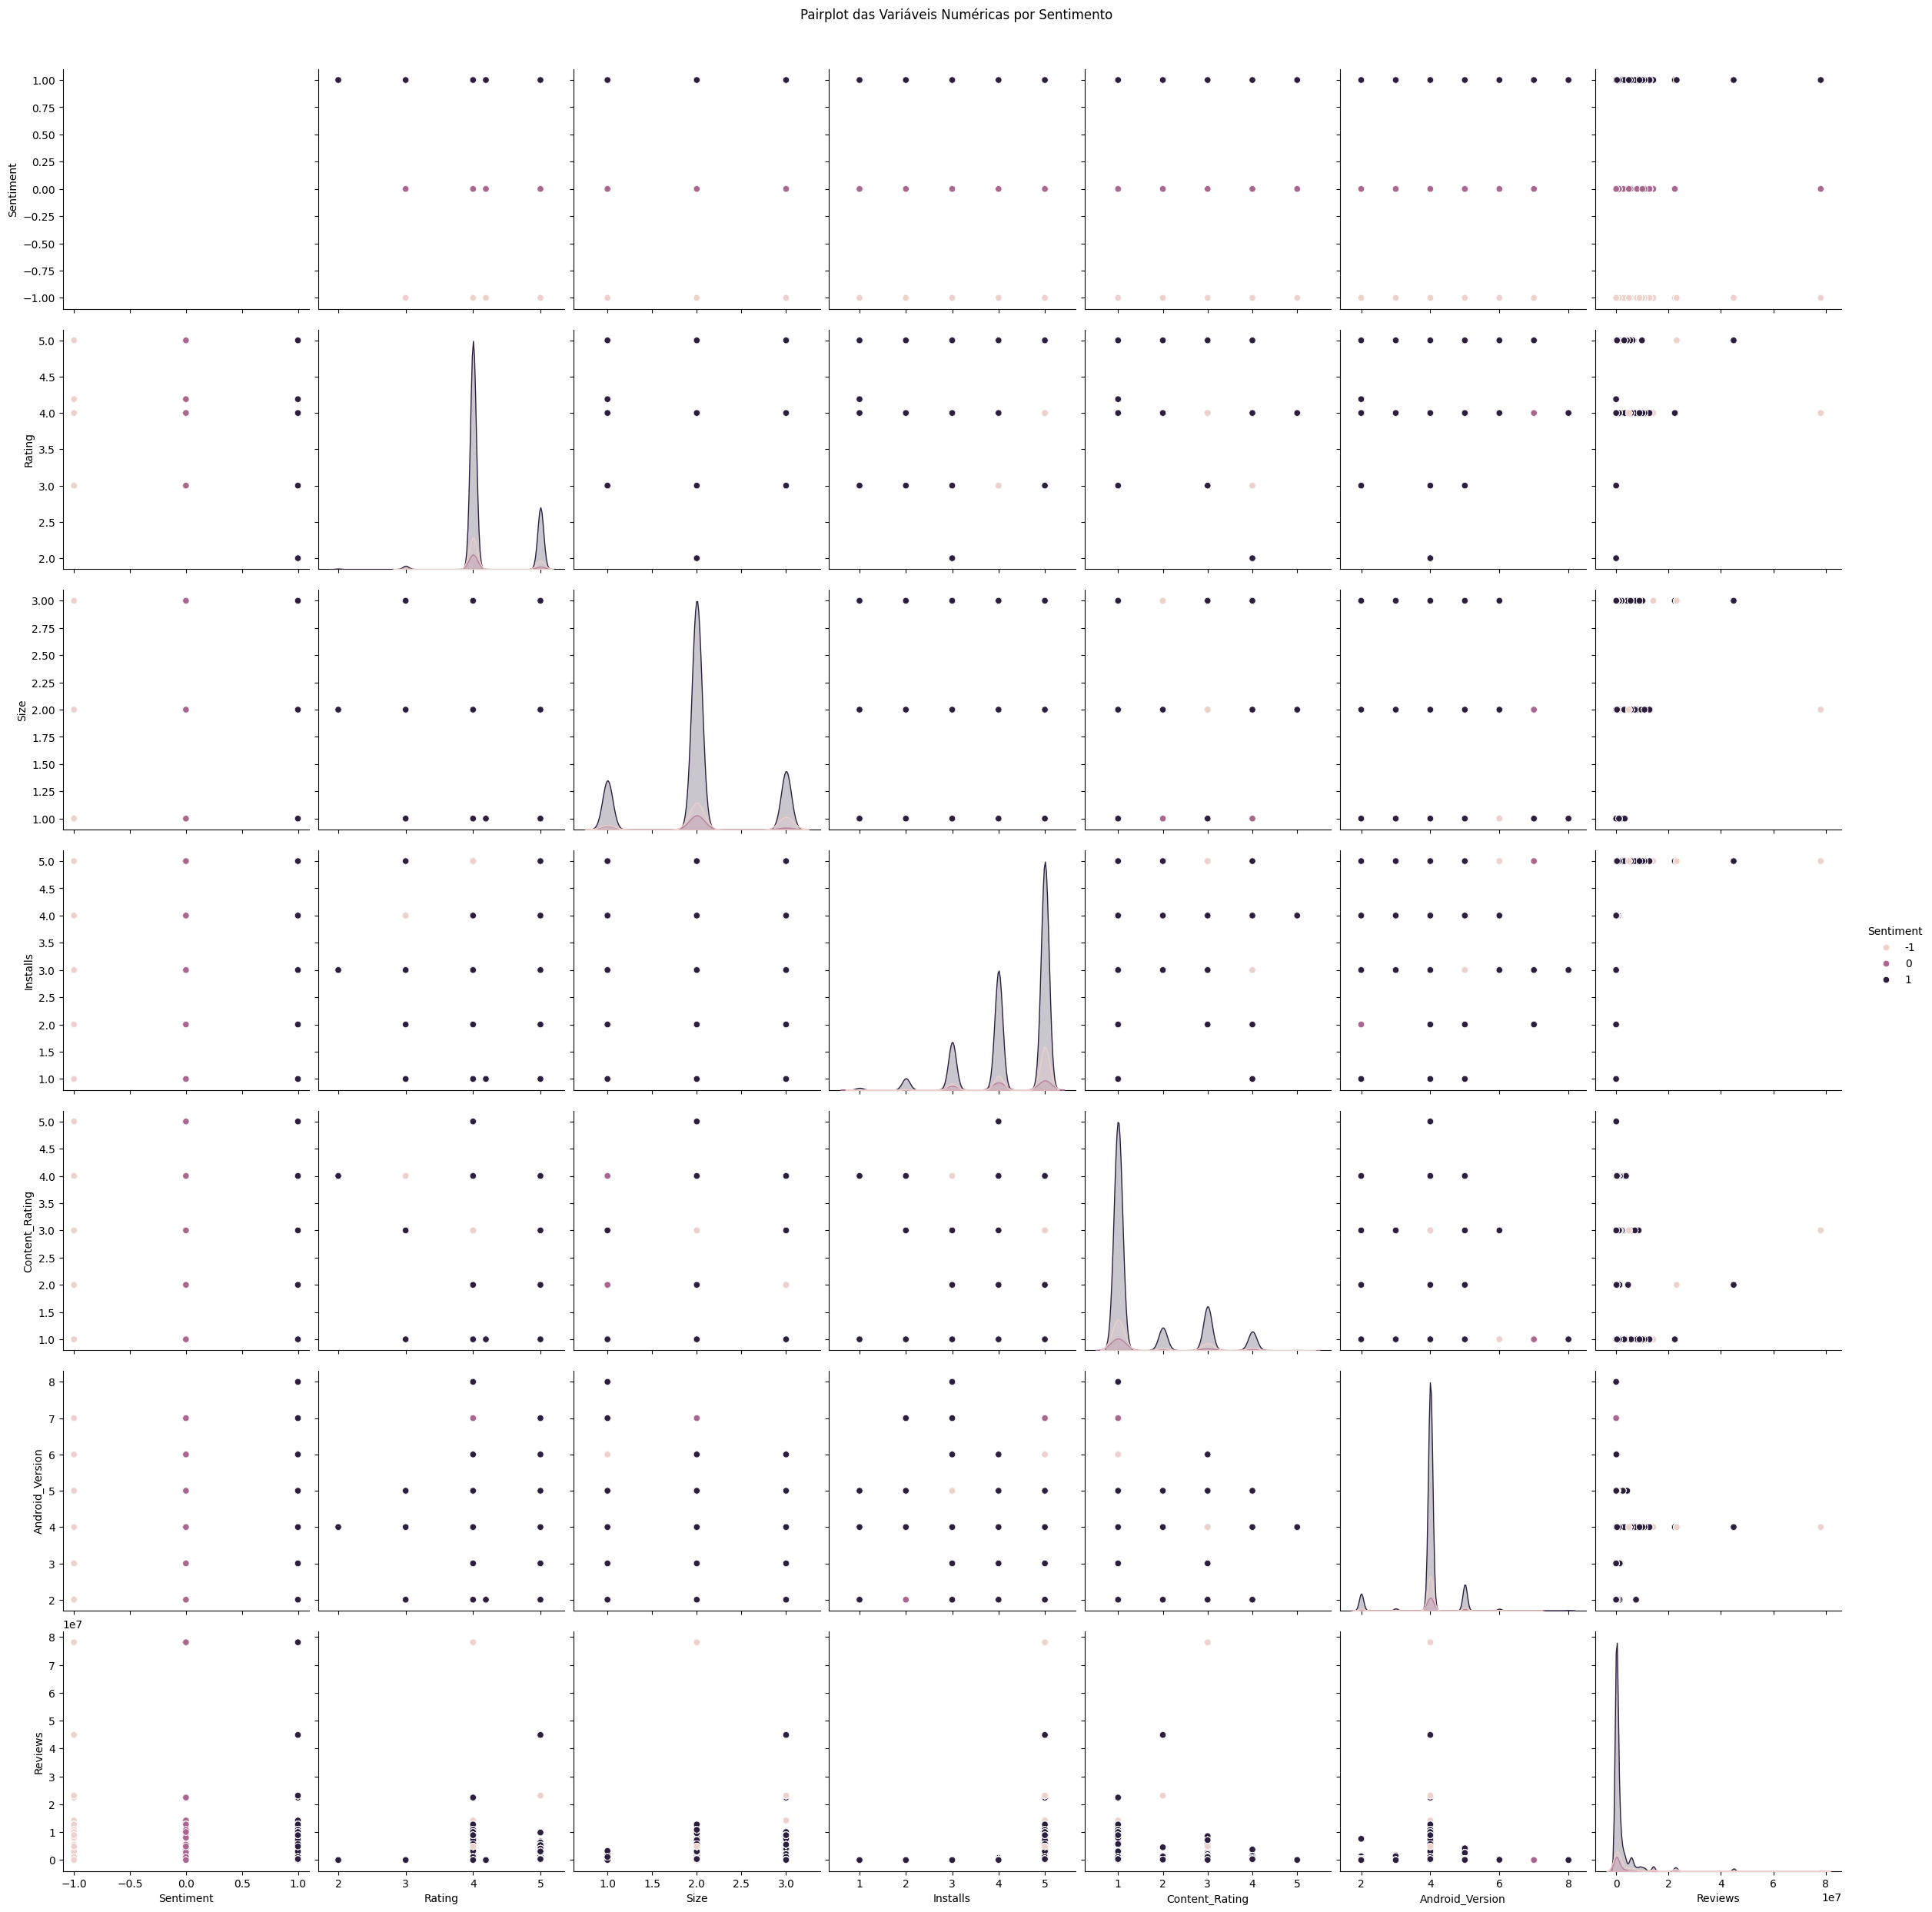

In [ ]:
# 1.2 - Pairplot com base no Sentiment
"""
Gera um pairplot das colunas numéricas selecionadas, colorindo os pontos pelo Sentiment.
Permite visualizar relações bivariadas e distribuições individuais por categoria de sentimento.
"""
# Verificar se todas as colunas existem no DataFrame
colunas_existentes = [col for col in colunas_numericas if col in df.columns]

sns.pairplot(df, hue='Sentiment', vars=colunas_existentes, height=3.5)
plt.suptitle("Pairplot das Variáveis Numéricas por Sentimento", y=1.02)
plt.show()

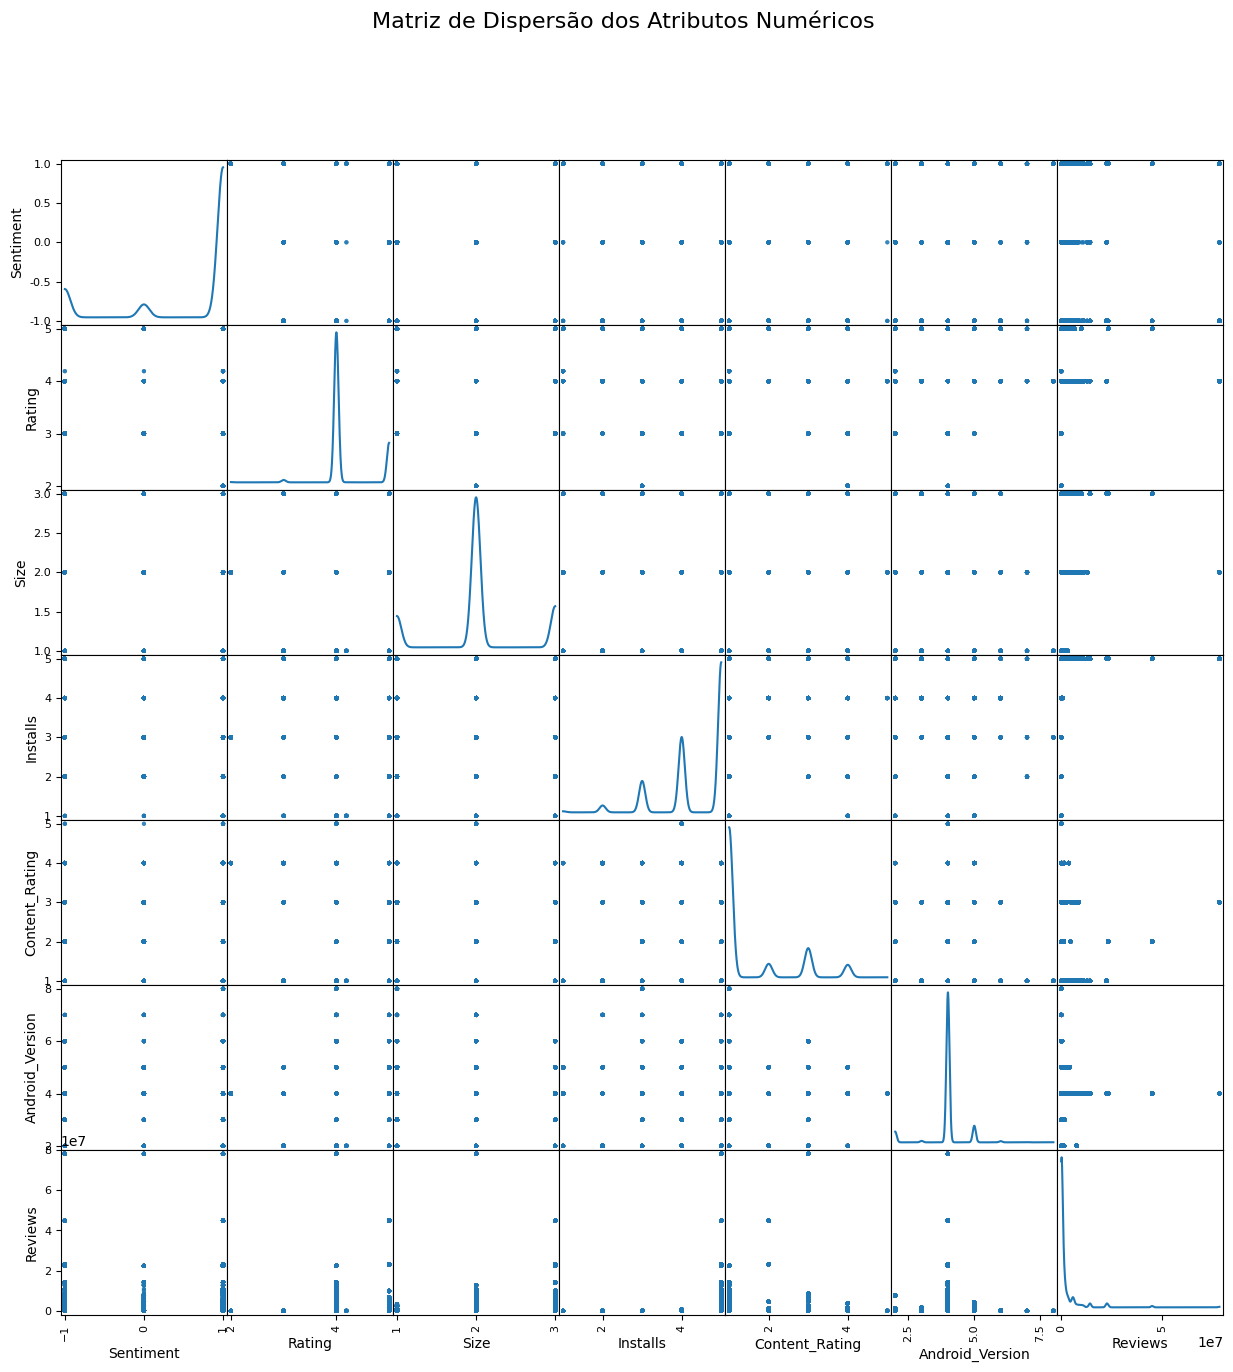

In [ ]:
# 1.3 - Scatter Matrix
"""
Gera uma matriz de dispersão (scatter matrix) das colunas numéricas selecionadas.
Cada gráfico de dispersão mostra a relação entre duas variáveis, enquanto a diagonal
exibe a densidade (KDE) de cada variável individualmente. Facilita a visualização
de correlações e distribuições entre atributos numéricos.
"""
pd.plotting.scatter_matrix(df[colunas_numericas], figsize=(15,15), diagonal='kde')
plt.suptitle("Matriz de Dispersão dos Atributos Numéricos", fontsize=16)
plt.show()


Contagem de apps por Sentimento:
Sentiment
 1    96242
-1    18134
 0     8286
Name: count, dtype: int64


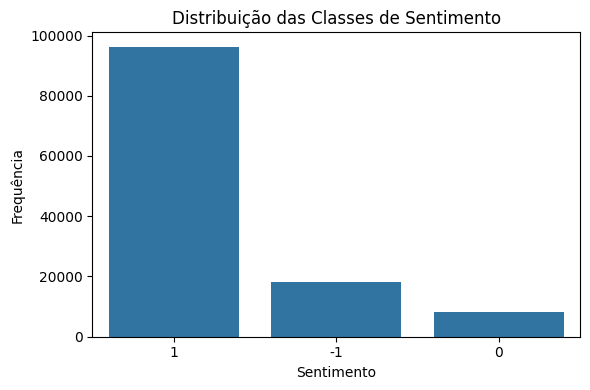

In [ ]:
# 1.4 - Contagem das classes de Sentiment
"""
Exibe a contagem de apps em cada categoria de Sentiment e gera um gráfico de barras.
O print mostra o número exato de ocorrências por classe, enquanto o countplot
visualiza a distribuição das categorias de sentimento de forma gráfica.
O parâmetro 'order' garante que as barras apareçam na ordem decrescente de frequência.
"""
print("Contagem de apps por Sentimento:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Distribuição das Classes de Sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


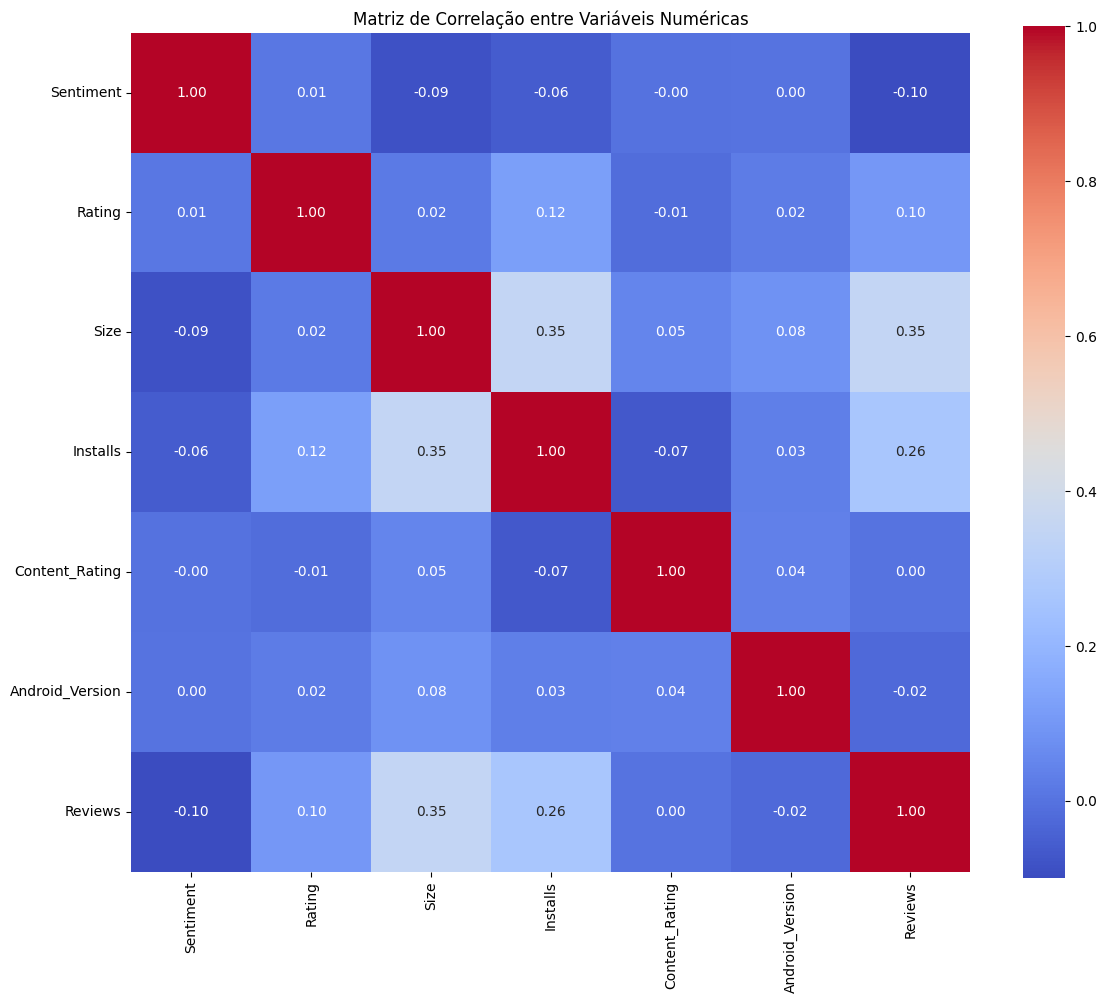

In [ ]:
# 1.6 - Matriz de correlação entre numéricas
"""
Calcula e visualiza a correlação entre as colunas numéricas do DataFrame.
A correlação mede a força e direção do relacionamento linear entre duas variáveis,
variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).
O heatmap exibe os valores de correlação e usa um gradiente de cores ('coolwarm')
para facilitar a identificação de relações fortes ou fracas entre atributos.
"""
corr_matrix = df[colunas_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1125830312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_categories.index, x=top10_categories.values, palette='viridis')


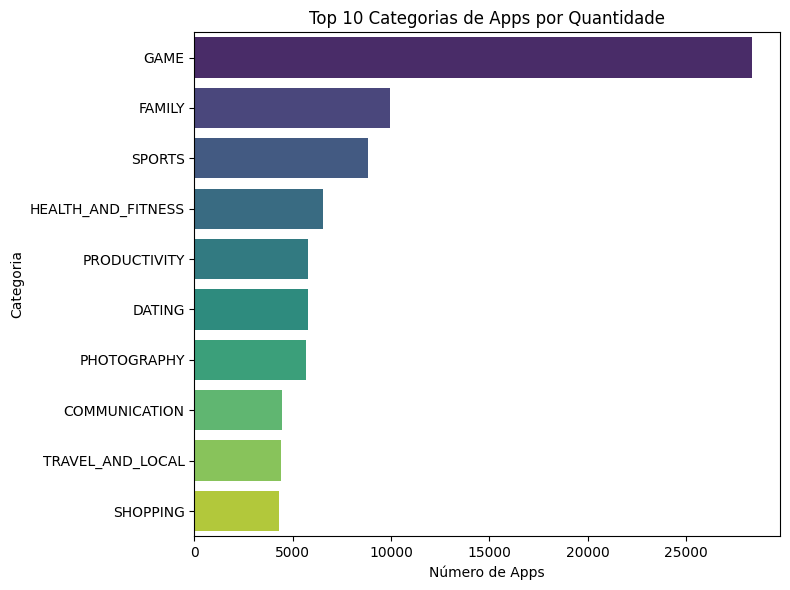

In [ ]:
# 1.7 - Top 10 categorias mais populares
"""
Calcula e visualiza as 10 categorias de apps com maior quantidade de registros.
O value_counts() identifica a frequência de cada categoria e head(10) seleciona
as 10 mais populares. O barplot exibe graficamente essas categorias, facilitando
a comparação visual do número de apps por categoria.
"""
top10_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top10_categories.index, x=top10_categories.values, palette='viridis')
plt.title("Top 10 Categorias de Apps por Quantidade")
plt.xlabel("Número de Apps")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()


In [ ]:
# =========================================
# GERANDO AS NOTAS DOS APPS E TREINAMENTO
# =========================================

# 1 - Preparação dos dados para geração de notas e treinamento
"""
Importa as bibliotecas necessárias para manipulação de dados, normalização,
redução de dimensionalidade (PCA), agrupamento (KMeans) e recomendação (KNN).

Agrupa o DataFrame original por aplicativo (App) para consolidar informações
quando há múltiplas entradas do mesmo app. Para cada app, realiza:
- 'Sentiment': média dos sentimentos
- 'Category', 'Type', 'Content_Rating': mantém o primeiro valor (assume-se consistente)
- 'Rating', 'Reviews', 'Size', 'Installs', 'Android_Version': média dos valores

O resultado é um DataFrame único por app, facilitando a aplicação de normalização,
PCA, clustering e cálculo das notas finais.
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Agrupamento por app consolidando múltiplas entradas
df_agrupado = df.groupby('App').agg({
    'Sentiment': 'mean',
    'Category': 'first',
    'Rating': 'mean',
    'Reviews': 'mean',
    'Type': 'first',
    'Size': 'mean',
    'Installs': 'mean',
    'Content_Rating': 'first',
    'Android_Version': 'mean'
}).reset_index()



In [ ]:
# 2 - Pesos para cálculo da nota
pesos = {
    'Rating': 0.25,
    'Sentiment': 0.20,
    'Installs': 0.10,
    'Size': 0.10,
    'Content_Rating': 0.10,
}

In [ ]:
# 3 - Função para gerar nota final dos apps
"""
Gera uma nota final para cada app combinando análise de PCA, clustering KMeans
e pesos dos atributos originais. Funciona por categoria de app para tratar
grupos de forma independente.

Passos principais:
1. Filtra os dados por categoria.
2. Normaliza temporariamente os atributos selecionados para cálculo.
3. PCA:
   - Reduz a dimensionalidade para 1 componente principal.
   - Normaliza a nota obtida para escala 0-1.
4. KMeans:
   - Agrupa os apps em até 5 clusters (ou menos se houver poucos apps na categoria).
   - Calcula a média dos centros de cada cluster para ranqueá-los.
   - Gera nota do KMeans e normaliza para 0-1.
5. Nota ponderada por atributos originais:
   - Normaliza cada atributo individualmente.
   - Multiplica pelo peso definido e soma para gerar nota ponderada.
6. Combinação final:
   - Combina PCA e KMeans com pesos definidos (peso_pca e peso_kmeans),
     dando 70% de importância a essas duas e 30% à nota ponderada dos atributos.
   - Escala para 0-100 e arredonda para 2 casas decimais.
7. Caso algum valor esteja ausente, utiliza a nota ponderada como fallback.
8. Concatena os resultados de todas as categorias em um DataFrame final e retorna.

Parâmetros:
- df: DataFrame de apps agrupados.
- pesos: dicionário com pesos para cada atributo numérico.
- peso_pca, peso_kmeans: pesos para combinar PCA e KMeans na nota final.
"""
def gerar_nota_final(df, pesos, peso_pca=0.6, peso_kmeans=0.4):
    df_final = pd.DataFrame()

    for cat in df['Category'].unique():
        df_cat = df[df['Category'] == cat].copy()
        X = df_cat[list(pesos.keys())]

        # Normalização apenas temporária (para PCA e KMeans)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # -----------------------
        # PCA
        # -----------------------
        pca = PCA(n_components=1)
        nota_pca = pca.fit_transform(X_scaled)
        nota_pca = (nota_pca - nota_pca.min()) / (nota_pca.max() - nota_pca.min())
        df_cat['Nota_PCA'] = nota_pca.flatten()

        # -----------------------
        # KMeans
        # -----------------------
        n_clusters = min(5, len(df_cat))
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)
        cluster_means = pd.DataFrame(kmeans.cluster_centers_).mean(axis=1)
        ranking_clusters = cluster_means.rank(ascending=False)
        nota_kmeans = pd.Series(clusters).map(ranking_clusters)
        nota_kmeans = (nota_kmeans - nota_kmeans.min()) / (nota_kmeans.max() - nota_kmeans.min())
        df_cat['Nota_KMeans'] = nota_kmeans.values

        # -----------------------
        # Nota ponderada pelos atributos originais
        # -----------------------
        nota_ponderada = np.zeros(len(df_cat))
        for col, peso in pesos.items():
            denom = df_cat[col].max() - df_cat[col].min()
            col_norm = np.where(denom != 0, (df_cat[col] - df_cat[col].min()) / denom, 0)
            nota_ponderada += col_norm * peso
        df_cat['Nota_Attr'] = nota_ponderada

        # -----------------------
        # Combinação final
        # -----------------------
        df_cat['Nota_Final'] = ((df_cat['Nota_PCA'] * peso_pca + df_cat['Nota_KMeans'] * peso_kmeans) * 0.7
                                + df_cat['Nota_Attr'] * 0.3) * 100

        # Substitui qualquer NaN remanescente por Nota_Attr*100
        df_cat['Nota_Final'] = df_cat['Nota_Final'].fillna(df_cat['Nota_Attr'] * 100).round(2)

        df_final = pd.concat([df_final, df_cat], axis=0)

    df_final.reset_index(drop=True, inplace=True)
    return df_final

In [ ]:
# 4 - Gera notas finais
df_model = gerar_nota_final(df_agrupado, pesos)
print("✅ Nota final gerada para cada app (0–100).")

# Guarda versão original para exibição
df_model_orig = df_model.copy()



✅ Nota final gerada para cada app (0–100).


In [ ]:
# ==================================================
# Verificar valores em branco no DataFrame df_model
# ==================================================
valores_em_branco = df_model.isna().sum()  # conta quantos NaN por coluna
total_linhas = len(df_model)

print("=== Valores em branco por coluna ===")
print(valores_em_branco)

print(f"\nTotal de linhas: {total_linhas}")

# Mostra colunas que têm pelo menos 1 valor em branco
colunas_com_branco = valores_em_branco[valores_em_branco > 0]
if not colunas_com_branco.empty:
    print("\nColunas com valores em branco:")
    print(colunas_com_branco)
else:
    print("\nNenhuma coluna com valores em branco! ✅")

=== Valores em branco por coluna ===
App                0
Sentiment          0
Category           0
Rating             0
Reviews            0
Type               0
Size               0
Installs           0
Content_Rating     0
Android_Version    0
Nota_PCA           0
Nota_KMeans        0
Nota_Attr          0
Nota_Final         0
dtype: int64

Total de linhas: 1020

Nenhuma coluna com valores em branco! ✅


In [ ]:
# 5 - função para buscar APPs

def buscar_apps(df,
                app=None,
                categoria=None,
                tipo=None,
                sentimento_min=None,
                rating_min=None,
                tamanho=None,
                installs=None,
                faixa_etaria=None,
                versao_android_min=None):
    """
    Filtra apps com base em múltiplos critérios e retorna os 10 mais bem avaliados.
    Caso não encontre resultados, exibe mensagem e mostra o Top 10 da categoria ou geral.
    """

    df_filtrado = df.copy()

    # -----------------------
    # Filtros textuais
    # -----------------------
    if app:
        df_filtrado = df_filtrado[df_filtrado['App'].str.contains(app, case=False, na=False)]
    if categoria:
        df_filtrado = df_filtrado[df_filtrado['Category'] == categoria]
    if tipo:
        df_filtrado = df_filtrado[df_filtrado['Type'] == tipo]

    # -----------------------
    # Filtros numéricos e lógicos
    # -----------------------
    if sentimento_min is not None:
        df_filtrado = df_filtrado[df_filtrado['Sentiment'] >= sentimento_min]
    if rating_min is not None:
        df_filtrado = df_filtrado[df_filtrado['Rating'] >= rating_min]
    if tamanho is not None:
        df_filtrado = df_filtrado[df_filtrado['Size'] == tamanho]
    if installs is not None:
        df_filtrado = df_filtrado[df_filtrado['Installs'] == installs]
    if faixa_etaria is not None:
        df_filtrado = df_filtrado[df_filtrado['Content_Rating'] == faixa_etaria]
    if versao_android_min is not None:
        # Mostra apps compatíveis com a versão informada e anteriores
        df_filtrado = df_filtrado[df_filtrado['Android_Version'] <= versao_android_min]

    # -----------------------
    # Verifica se há resultados
    # -----------------------
    if df_filtrado.empty:
        print("⚠️ Nenhum aplicativo encontrado com os filtros informados.")

        if categoria:
            print(f"🔎 Exibindo o Top 10 da categoria '{categoria}' como alternativa.\n")
            df_fallback = df[df['Category'] == categoria].sort_values(by='Nota_Final', ascending=False).head(10)
        else:
            print("🔎 Exibindo o Top 10 geral como alternativa.\n")
            df_fallback = df.sort_values(by='Nota_Final', ascending=False).head(10)

        return df_fallback[['App', 'Category', 'Nota_Final', 'Rating', 'Installs', 'Size']]

    # -----------------------
    # Caso encontre resultados, ordena e retorna
    # -----------------------
    print(f"✅ {len(df_filtrado)} aplicativos encontrados com os filtros informados.\n")
    df_filtrado = df_filtrado.sort_values(by='Nota_Final', ascending=False)
    return df_filtrado[['App', 'Category', 'Nota_Final', 'Rating', 'Installs', 'Size']].head(10)


# 4️⃣ Gerar notas
df_model = gerar_nota_final(df_agrupado, pesos)

In [ ]:
#EXEMPLOS DE USO -- APAGAR DEPOIS

top10_games = buscar_apps(df_model, categoria="GAME")
top10_games


✅ 104 aplicativos encontrados com os filtros informados.



,App,Category,Nota_Final,Rating,Installs,Size
200,Four In A Line,GAME,75.11,4.0,4.0,1.0
143,Bricks n Balls,GAME,72.43,4.0,4.0,2.0
162,Clue,GAME,72.00,5.0,3.0,2.0
145,Bubble Shooter 2,GAME,71.25,4.0,4.0,2.0
146,Bubble Shooter Genies,GAME,69.12,4.0,4.0,2.0
213,Glow Hockey,GAME,67.79,4.0,5.0,2.0
140,Block Puzzle Classic Legend !,GAME,67.17,4.0,4.0,1.0
201,Four In A Line Free,GAME,66.29,4.0,4.0,2.0
203,Fruit Ninja®,GAME,64.96,4.0,5.0,2.0
152,Candy Bomb,GAME,64.48,4.0,5.0,2.0


In [ ]:
#EXEMPLOS DE USO -- APAGAR DEPOIS
top10_geral = buscar_apps(df_model)
top10_geral


✅ 1020 aplicativos encontrados com os filtros informados.



,App,Category,Nota_Final,Rating,Installs,Size
408,"All Football GO- Live Score, Games",SPORTS,83.41,5.0,3.0,1.0
200,Four In A Line,GAME,75.11,4.0,4.0,1.0
907,ColorSnap® Visualizer,HOUSE_AND_HOME,75.00,3.0,4.0,3.0
5,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,73.14,5.0,5.0,3.0
143,Bricks n Balls,GAME,72.43,4.0,4.0,2.0
394,Ghostery Privacy Browser,COMMUNICATION,72.42,4.0,4.0,1.0
377,Caller ID +,COMMUNICATION,72.42,4.0,4.0,1.0
162,Clue,GAME,72.00,5.0,3.0,2.0
313,"Hide App, Private Dating, Safe Chat - PrivacyH...",DATING,71.35,4.0,4.0,1.0
145,Bubble Shooter 2,GAME,71.25,4.0,4.0,2.0


In [ ]:
# ==================================================
# TREINAMENTO KNN
# ==================================================

# 6 - Treinamento KNN: Normalização dos dados
"""
Prepara os dados para o treinamento do modelo KNN (K-Nearest Neighbors).
A normalização é importante porque o KNN calcula distâncias entre pontos;
valores em escalas diferentes podem distorcer o cálculo.

Passos:
1. Define as colunas numéricas que serão usadas pelo KNN.
2. Cria uma cópia do DataFrame original para evitar alterar os dados originais.
3. Aplica StandardScaler para padronizar os atributos (média=0, desvio=1).
O DataFrame resultante 'df_knn' está pronto para treinar o modelo KNN.
"""
# Colunas numéricas usadas para KNN
colunas_numericas = ['Reviews', 'Rating', 'Size', 'Installs', 'Android_Version']



In [ ]:
# 7 - One-Hot Encoding das variáveis categóricas
"""
Converte colunas categóricas em variáveis dummy (0/1) para uso em modelos de ML.
Modelos como KNN não lidam diretamente com dados categóricos, então é necessário
transformá-los em formato numérico.

Passos:
1. Seleciona as colunas categóricas a serem codificadas ('Category' e 'Type').
2. Aplica pd.get_dummies:
   - Cria uma coluna para cada categoria presente.
   - drop_first=True evita multicolinearidade, removendo a primeira categoria.
   - prefix adiciona o nome da coluna original como prefixo nas novas colunas.

O resultado é o DataFrame 'df_dummies', pronto para ser concatenado com os atributos numéricos.
"""
colunas_categoricas = ['Category', 'Type']
df_dummies = pd.get_dummies(df_model[colunas_categoricas], drop_first=True, prefix=colunas_categoricas)


In [ ]:
# 8 - Matriz final para KNN (numéricas normalizadas + dummies)
"""
Cria a matriz final de atributos que será usada pelo modelo KNN.
Combina:
- Colunas numéricas já normalizadas (Reviews, Rating, Size, Installs, Android_Version)
- Variáveis categóricas convertidas em dummies

O índice do DataFrame é alinhado com o DataFrame original para garantir consistência
na identificação dos apps durante cálculos de distância ou recomendações.

O resultado 'X_knn_scaled_df' é a matriz final de entrada para treinar ou consultar o KNN.
"""
X_knn_df = pd.concat([df_model[colunas_numericas], df_dummies], axis=1)
X_knn_df.index = df_model.index  # garante alinhamento

In [ ]:
# 9 - Treinamento do KNN
"""
Cria e treina o modelo KNN (Nearest Neighbors) para recomendação de apps.
O KNN encontra os vizinhos mais próximos de um app com base na distância euclidiana
entre seus atributos normalizados e categóricos (dummies).

Passos:
1. Define o número de vizinhos a serem considerados (n_neighbors=50).
2. Define a métrica de distância a ser usada (euclidiana).
3. Ajusta (fit) o modelo nos dados de entrada 'X_knn_scaled_df'.

Após este passo, 'knn_model' pode ser usado para encontrar apps similares a um
dado app ou gerar recomendações baseadas em proximidade.
"""
knn_model = NearestNeighbors(n_neighbors=50, metric='euclidean')
knn_model.fit(X_knn_df.values)


NearestNeighbors(metric='euclidean', n_neighbors=50)

In [ ]:
# 10 - Função de busca e recomendações de apps (5 recomendações fixas)
"""
Permite buscar apps com filtros específicos e gera recomendações baseadas em KNN.
Combina filtragem por atributos e proximidade no espaço de features normalizadas.

Passos principais:
1. Cria uma cópia do DataFrame pontuado ('df_scored') para aplicar filtros.
2. Define o número fixo de recomendações: num_recomendacoes = 5.
3. Aplica filtros opcionais:
   - app (nome contém string)
   - Category, Type, Content_Rating
   - Sentiment_min, Rating_min, Size, Installs, Android_Version_max
4. Seleciona o Top 10 após filtragem, baseado na 'Nota_Final':
   - Caso nenhum app seja encontrado, mostra alternativas (Top 10 da categoria ou geral).
5. Recomendações KNN:
   - Calcula vetor de referência como a média dos atributos normalizados do Top 10.
   - Usa knn_model para encontrar os vizinhos mais próximos.
   - Remove duplicados do Top 10 e limita a 5 recomendações únicas.
6. Prepara DataFrames de retorno:
   - Mantém colunas originais relevantes ('App', 'Category', 'Type', 'Rating', 'Nota_Final').
   - Garante que as notas finais do cálculo fiquem associadas aos apps.
7. Retorna:
   - df_top10_orig: Top 10 apps filtrados
   - df_recomendacoes_orig: Até 5 recomendações únicas baseadas em KNN

Parâmetros:
- df_scored: DataFrame com notas finais dos apps
- df_orig: DataFrame original (para manter valores originais)
- X_knn_scaled_df: matriz de atributos para KNN (normalizada + dummies)
- knn_model: modelo KNN treinado
- app, Category, Type, Sentiment_min, Rating_min, Size, Installs, Content_Rating, Android_Version_max: filtros opcionais
"""
def buscar_apps_com_recomendacao(
    df_scored,
    df_orig,
    X_knn_df,
    knn_model,
    app=None,
    Category=None,
    Type=None,
    Sentiment_min=None,
    Rating_min=None,
    Size=None,
    Installs=None,
    Content_Rating=None,
    Android_Version_max=None
):
    df_filtrado = df_scored.copy()
    num_recomendacoes = 5

    # --- Filtros
    if app:
        df_filtrado = df_filtrado[df_filtrado['App'].str.contains(app, case=False, na=False)]
    if Category:
        df_filtrado = df_filtrado[df_filtrado['Category'] == Category]
    if Type:
        df_filtrado = df_filtrado[df_filtrado['Type'] == Type]
    if Sentiment_min is not None:
        df_filtrado = df_filtrado[df_filtrado['Sentiment'] >= Sentiment_min]
    if Rating_min is not None:
        df_filtrado = df_filtrado[df_filtrado['Rating'] >= Rating_min]
    if Size is not None:
        df_filtrado = df_filtrado[df_filtrado['Size'] == Size]
    if Installs is not None:
        df_filtrado = df_filtrado[df_filtrado['Installs'] == Installs]
    if Content_Rating is not None:
        df_filtrado = df_filtrado[df_filtrado['Content_Rating'] == Content_Rating]
    if Android_Version_max is not None:
        df_filtrado = df_filtrado[df_filtrado['Android_Version'] <= Android_Version_max]

    # --- Top 10 filtrados
    if df_filtrado.empty:
        print("⚠️ Nenhum app encontrado, exibindo alternativa.")
        if Category:
            df_top10 = df_scored[df_scored['Category'] == Category].sort_values(by='Nota_Final', ascending=False).head(10)
        else:
            df_top10 = df_scored.sort_values(by='Nota_Final', ascending=False).head(10)
    else:
        df_top10 = df_filtrado.sort_values(by='Nota_Final', ascending=False).head(10)
        print(f"✅ {len(df_top10)} apps encontrados")

    # --- Recomendações KNN (usa dados originais)
    indices_busca = df_top10.index
    vetor_referencia = X_knn_df.loc[indices_busca].mean(axis=0).values.reshape(1, -1)

    distances, indices = knn_model.kneighbors(vetor_referencia)
    vizinhos_indices = df_scored.index[indices.flatten()[1:]]
    df_recomendacoes = df_scored.loc[vizinhos_indices].copy()

    # Remove duplicados do Top 10
    df_recomendacoes = df_recomendacoes[~df_recomendacoes['App'].isin(df_top10['App'])].head(num_recomendacoes)

    if len(df_recomendacoes) < num_recomendacoes:
        print(f"⚠️ Apenas {len(df_recomendacoes)} recomendações únicas encontradas.")

    # --- Retorno com valores originais
    cols_retorno = ['App', 'Category', 'Type', 'Rating', 'Nota_Final']
    cols_retorno = [col for col in cols_retorno if col in df_orig.columns or col == 'Nota_Final']

    df_top10_orig = df_orig.loc[df_top10.index, cols_retorno].copy()
    df_top10_orig['Nota_Final'] = df_top10['Nota_Final'].values

    df_recomendacoes_orig = df_orig.loc[df_recomendacoes.index, cols_retorno].copy()
    df_recomendacoes_orig['Nota_Final'] = df_recomendacoes['Nota_Final'].values

    return df_top10_orig, df_recomendacoes_orig

In [ ]:
# exemplo de uso -- apagar depois
top10, recomendacoes = buscar_apps_com_recomendacao(
    df_scored=df_model,
    df_orig=df_model_orig,
    X_knn_df=X_knn_df,  # <-- nome consistente
    knn_model=knn_model,
    Category='GAME',
    Content_Rating=1,
    Type='Paid',
    Rating_min=2
)


print(top10)

print("\nRECOMENDAÇÕES KNN:")
print(recomendacoes)


✅ 1 apps encontrados
                      App Category  Type  Rating  Nota_Final
194  Farming Simulator 18     GAME  Paid     4.0       49.83

RECOMENDAÇÕES KNN:
                                                App          Category  Type  \
343                                         Flights  TRAVEL_AND_LOCAL  Free   
335                                   Choice Hotels  TRAVEL_AND_LOCAL  Free   
58                                         Chilindo          SHOPPING  Free   
359  Hostelworld: Hostels & Cheap Hotels Travel App  TRAVEL_AND_LOCAL  Free   
808                                   ForecaWeather           WEATHER  Free   

     Rating  Nota_Final  
343     4.0       51.34  
335     4.0       53.99  
58      4.0       44.09  
359     4.0       48.94  
808     4.0       36.42  


In [ ]:
# ==================================================
# Verificar valores em branco no DataFrame df_model
# ==================================================
valores_em_branco = df_model.isna().sum()  # conta quantos NaN por coluna
total_linhas = len(df_model)

print("=== Valores em branco por coluna ===")
print(valores_em_branco)

print(f"\nTotal de linhas: {total_linhas}")

# Mostra colunas que têm pelo menos 1 valor em branco
colunas_com_branco = valores_em_branco[valores_em_branco > 0]
if not colunas_com_branco.empty:
    print("\nColunas com valores em branco:")
    print(colunas_com_branco)
else:
    print("\nNenhuma coluna com valores em branco! ✅")


=== Valores em branco por coluna ===
App                0
Sentiment          0
Category           0
Rating             0
Reviews            0
Type               0
Size               0
Installs           0
Content_Rating     0
Android_Version    0
Nota_PCA           0
Nota_KMeans        0
Nota_Attr          0
Nota_Final         0
dtype: int64

Total de linhas: 1020

Nenhuma coluna com valores em branco! ✅


In [ ]:
import joblib
import os


df_model_final = df_model


# Diretório onde os arquivos serão salvos
save_dir = '/content/drive/MyDrive/FACULDADE/google play store/modelos_final'
os.makedirs(save_dir, exist_ok=True)

joblib.dump(df_model_final, os.path.join(save_dir, 'df_model_final.pkl'))  # DataFrame final com Nota_Final
joblib.dump(df_model_orig, os.path.join(save_dir, 'df_model_orig.pkl'))    # DataFrame original
joblib.dump(X_knn_df, os.path.join(save_dir, 'X_knn_df.pkl'))              # Matriz KNN
joblib.dump(knn_model, os.path.join(save_dir, 'knn_model.pkl'))

print("✅ Todos os objetos atualizados foram salvos com sucesso!")


✅ Todos os objetos atualizados foram salvos com sucesso!
